<a href="https://colab.research.google.com/github/saryurawaley/Engphys3mn4/blob/main/Assignments/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

Due: Thursday Nov 6th EOD

## Q1. The Blasius equation appears in fluid mechanics as a laminar flow boundary layer and is written:

$$y^{\prime\prime\prime} + y y^{\prime\prime} = 0 $$

### a) Express this 3rd order ODE as a system of first order ODEs.
{answer}

In [ ]:
y_1_prime = 'y_2'
y_2_prime = 'y_3'
y_3_prime = '-y_1 * y_3'

print(f"The system of first-order ODEs is:")
print(f"y_1' = {y_1_prime}")
print(f"y_2' = {y_2_prime}")
print(f"y_3' = {y_3_prime}")

The system of first-order ODEs is:
y_1' = y_2
y_2' = y_3
y_3' = -y_1 * y_3


### b) Solve for $y(z)$ as an initial value problem assuming the boundary conditions below and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime\prime}(z = 0) &= 1 \\
\end{align}
$$

HINT: Read and consider part c) before implementing this.

{Method, answer}

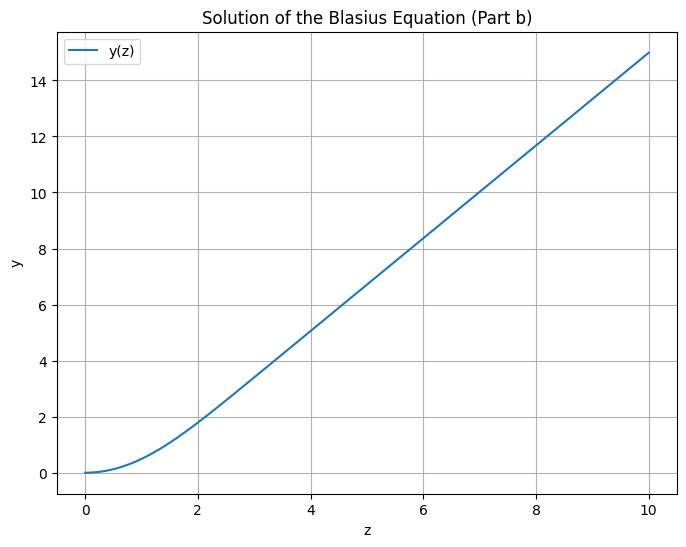

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of first-order ODEs
def blasius_ode(z, y):
    y1, y2, y3 = y
    dy1dz = y2
    dy2dz = y3
    dy3dz = -y1 * y3
    return [dy1dz, dy2dz, dy3dz]

# Define the initial conditions
y0 = [0, 0, 1]

# Define the range for z
z_span = (0, 10) # We can adjust the upper limit based on convergence

# Solve the ODE
sol = solve_ivp(blasius_ode, z_span, y0, dense_output=True)

# Generate points for plotting
z_plot = np.linspace(z_span[0], z_span[1], 100)
y_plot = sol.sol(z_plot)

# Plot the solution for y(z)
plt.figure(figsize=(8, 6))
plt.plot(z_plot, y_plot[0], label='y(z)')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Solution of the Blasius Equation (Part b)')
plt.grid(True)
plt.legend()
plt.show()

## c) Use your *method* from b) to find a solution for $y(z)$ that fits the boundary conditions below, and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime}(z = \infty) &= 2 \\
\end{align}
$$

{Method, implementation, answer}

Optimal y''(0) to satisfy y'(infinity)=2 by using shooting method is approximately: 1.327958


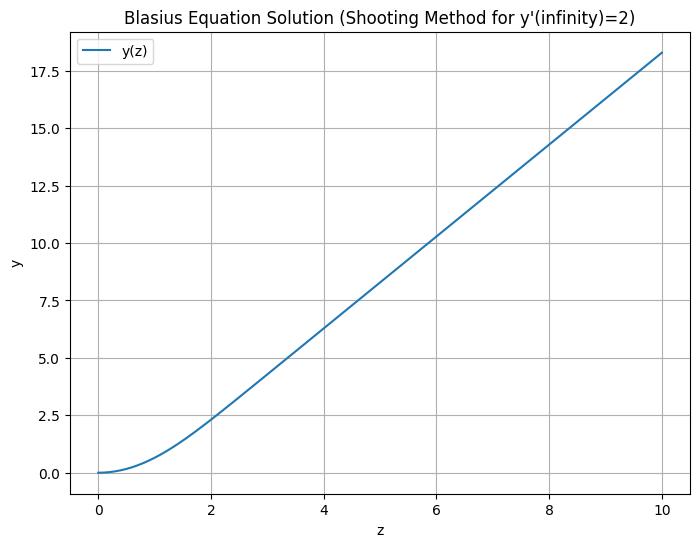

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

#blasius system of first-order ODEs
def blasius_system(z, y_vec):
    y, yp, ypp = y_vec
    return [yp, ypp, -y * ypp]

#function to compute difference between computed y'(infinity) and target value 2
def boundary_condition_mismatch(s):
    #initial conditions depend on guessed y''(0) = s, where s is the initial guess
    y0 = [0, 0, s]
    z_span = (0, 10)
    sol = solve_ivp(blasius_system, z_span, y0, t_eval=[z_span[1]])
    y_end = sol.y[:, -1]
    return y_end[1] - 2   #want y'(infinity) = 2

#use root-finding to find correct s = y''(0)
shoot = root_scalar(boundary_condition_mismatch, bracket=[0.1, 5], method='bisect')
s_opt = shoot.root #the optimal s
print(f"Optimal y''(0) to satisfy y'(infinity)=2 by using shooting method is approximately: {s_opt:.6f}")

#solve again using the found initial condition
z_span = (0, 10)
initial_conditions = [0, 0, s_opt]
solution = solve_ivp(blasius_system, z_span, initial_conditions, dense_output=True)

#generate solution points for plotting
z_values = np.linspace(z_span[0], z_span[1], 200)
y_values = solution.sol(z_values)

#plot results
plt.figure(figsize=(8, 6))
plt.plot(z_values, y_values[0], label='y(z)')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Blasius Equation Solution (Shooting Method for y\'(infinity)=2)')
plt.grid(True)
plt.legend()
plt.show()

## Q2

The Fourier series shows that periodic functions can be written as an infinite sum of sine and cosine waves:

 $$f(x)= \frac{A_0}{2}+\sum_{n=1}^{\infty}A_n\ \cos{(nx)} + B_n\ \sin{(nx)}$$

Due to function orthogonality, the values of $A_n$ and $B_n$ can be computed using the following formulae:

 $$A_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos{(nx)}\ dx$$
 $$B_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin{(nx)}\ dx$$

Periodic functions can be approximated by truncating the Fourier series at some $n = N$.

### 2a

Write a function that takes a $2-\pi$ periodic function and a degree $n$, then outputs the $n-th$ Fourier coefficients $[A_n, B_n]$. Use the equations above with a suitable integration method. (Don't use packaged Fourier analysis tools)

Test it for a suitable set of functions for which you have an analytic answer.

{implementation, answer}

In [4]:
from scipy.integrate import quad

def fourier_coefficients(f, n):
    """
    Calculates the n-th Fourier coefficients [A_n, B_n] for a 2pi-periodic function.

    Args:
        f: The 2pi-periodic function.
        n: The order of the coefficient.

    Returns:
        A tuple containing the n-th Fourier coefficients (A_n, B_n).
    """
    # Calculate A_n
    integrand_a = lambda x: f(x) * np.cos(n * x)
    a_n, _ = quad(integrand_a, -np.pi, np.pi)
    a_n /= np.pi

    # Calculate B_n
    integrand_b = lambda x: f(x) * np.sin(n * x)
    b_n, _ = quad(integrand_b, -np.pi, np.pi)
    b_n /= np.pi

    return a_n, b_n

# Test the function with a known function, e.g., f(x) = x for -pi to pi
# The Fourier series for f(x) = x is 2 * sum((-1)^(n+1)/n * sin(nx))
# So, A_n = 0 and B_n = 2 * (-1)^(n+1) / n
def test_function(x):
    return x

#testing for n=0
a0, b0 = fourier_coefficients(test_function, 0)
print(f"For f(x) = x, n=0: A0 = {a0}, B0 = {b0} (Expected: A0 = 0, B0 = 0)")

#test for n=1
a1, b1 = fourier_coefficients(test_function, 1)
b1_ex = 2*(-1)**(1+1)/1
print(f"For f(x) = x, n=1: A1 = {a1}, B1 = {b1} (Expected: A1 = 0, B1 = {b1_ex})")
#test for n=2
a2, b2 = fourier_coefficients(test_function, 2)
b2_ex = 2*(-1)**(2+1)/2
print(f"For f(x) = x, n=2: A2 = {a2}, B2 = {b2} (Expected: A2 = 0, B2 = {b2_ex})")

#test for n=3
b3_ex = 2*(-1)**(3+1)/3
a3, b3 = fourier_coefficients(test_function, 3)
print(f"For f(x) = x, n=3: A3 = {a3}, B3 = {b3} (Expected: A3 = 0, B3 = {b3_ex})")

For f(x) = x, n=0: A0 = 0.0, B0 = 0.0 (Expected: A0 = 0, B0 = 0)
For f(x) = x, n=1: A1 = 0.0, B1 = 1.9999999999999998 (Expected: A1 = 0, B1 = 2.0)
For f(x) = x, n=2: A2 = 0.0, B2 = -0.9999999999999997 (Expected: A2 = 0, B2 = -1.0)
For f(x) = x, n=3: A3 = 0.0, B3 = 0.6666666666666665 (Expected: A3 = 0, B3 = 0.6666666666666666)


### 2b
Find the coefficients of the following functions and expansion orders:
{All answers}

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 5

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 20

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 20

In [6]:
#function 1: f(x) = np.mod(x, np.pi/2)

#N = 5
f1 = lambda x: np.mod(x, np.pi/2)
N1 = 5
print(f"fourier coefficients for f(x) = np.mod(x, np.pi/2) with N = {N1}:")
for n in range(N1 + 1):
    an, bn = fourier_coefficients(f1, n)
    print(f"n={n}: An = {an}, Bn = {bn}")

print("-" * 20)

#N = 20
N2 = 20
print(f"fourier coefficients for f(x) = np.mod(x, np.pi/2) with N = {N2}:")
for n in range(N2 + 1):
    an, bn = fourier_coefficients(f1, n)
    print(f"n={n}: An = {an}, Bn = {bn}")

print("=" * 30)

# Case 4: f(x) = (x > -np.pi/2) & (x < np.pi/2), N = 20
f_case4 = lambda x: 1 if (-np.pi/2 < x < np.pi/2) else 0
N_case4 = 20

print(f"Calculating coefficients for f(x) = 1 for -pi/2 < x < pi/2, 0 otherwise with N = {N_case4}")
for n in range(N_case4 + 1):
    a_n, b_n = fourier_coefficients(f_case4, n)
    if n == 0:
        print(f"A_0: {a_n}")
    else:
        print(f"A_{n}: {a_n}, B_{n}: {b_n}")

fourier coefficients for f(x) = np.mod(x, np.pi/2) with N = 5:
n=0: An = 1.5707963267948966, Bn = 0.0
n=1: An = 1.0601848938211722e-16, Bn = 3.533949646070574e-17
n=2: An = -1.4135798584282297e-16, Bn = -7.067899292141149e-17
n=3: An = -7.067899292141149e-17, Bn = 3.533949646070574e-17
n=4: An = 4.1633363423443364e-17, Bn = -0.5
n=5: An = 1.1485336349729365e-16, Bn = -7.067899292141149e-17
--------------------
fourier coefficients for f(x) = np.mod(x, np.pi/2) with N = 20:
n=0: An = 1.5707963267948966, Bn = 0.0
n=1: An = 1.0601848938211722e-16, Bn = 3.533949646070574e-17
n=2: An = -1.4135798584282297e-16, Bn = -7.067899292141149e-17
n=3: An = -7.067899292141149e-17, Bn = 3.533949646070574e-17
n=4: An = 4.1633363423443364e-17, Bn = -0.5
n=5: An = 1.1485336349729365e-16, Bn = -7.067899292141149e-17
n=6: An = -3.092205940311753e-17, Bn = -5.300924469105861e-17
n=7: An = -1.236882376124701e-16, Bn = 8.834874115176436e-18
n=8: An = -8.326672684688674e-17, Bn = -0.24999999999999986
n=9: An =

## Q3:

Given $$\int_{-1}^1 f(x) dx = 3$$ and $$f(-3^{-\frac{1}{2}}) = 1$$

Assuming $f$ is a cubic polynomial, what is $f(3^{-\frac{1}{2}})$? Why?

{answer}

In [9]:
import sympy as sp

#define symbols
x, a, b, c, d = sp.symbols('x a b c d', real=True)

#define cubic polynomial
f = a*x**3 + b*x**2 + c*x + d

#given integral condition: ∫[-1,1] f(x) dx = 3
integral_expr = sp.integrate(f, (x, -1, 1))
eq1 = sp.Eq(integral_expr, 3)

#simplify the integral
integral_simplified = sp.simplify(integral_expr)
print("Integral over [-1,1]:", integral_simplified)

#simplify eq1 to relate b and d
eq1_simplified = sp.simplify(eq1)
print("Equation from integral condition:", eq1_simplified)

#substitute relation from integral:
#integral = (2*b/3) + 2*d = 3  →  b/3 + d = 1.5
relation = sp.Eq(b/3 + d, 1.5)

#define k = 3^(-1/2)
k = 3**(-sp.Rational(1,2))

#define f(x) and f(-x)
f_pos = f.subs(x, k)
f_neg = f.subs(x, -k)

#relation between f(x) and f(-x) from even part: f(x) + f(-x) = 2*(b*x^2 + d)
f_sum = sp.simplify(f_pos + f_neg)
print("\nf(x) + f(-x) =", f_sum)

#substitute k^2 = 1/3 and relation b/3 + d = 1.5
f_sum_value = f_sum.subs({x: k, b/3 + d: 1.5})
print("After applying integral condition:", f_sum_value)

#now use f(-k) = 1 to find f(k)
f_k = sp.solve(sp.Eq(f_pos + 1, 3), f_pos)[0]
print("\nTherefore, f(3^(-1/2)) =", f_k)


#for a cubic polynomial f(x) = ax^3 + bx^2 + cx + d, the integral from -1 to 1 is 2b/3 + 2d.
#given the integral is 3, we have 2b/3 + 2d = 3.
#also, for any symmetric points x and -x, f(x) + f(-x) = (ax^3 + bx^2 + cx + d) + (-ax^3 + bx^2 - cx + d) = 2bx^2 + 2d.
#in this case, x = 3^(-1/2), so x^2 = 1/3.
#therefore, f(3^(-1/2)) + f(-3^(-1/2)) = 2b(1/3) + 2d = 2b/3 + 2d.
#since 2b/3 + 2d = 3, we have f(3^(-1/2)) + f(-3^(-1/2)) = 3.
#given f(-3^(-1/2)) = 1, we can substitute this into the equation:
#f(3^(-1/2)) + 1 = 3
#f(3^(-1/2)) = 2.
#for a cubic polynomial, the integral -1 to 1 depends only on the coefficients of the even powers of x (which are b and d).
#similarly for any symmetric points x and -x, the sum f(x) + f(-x) also depends only of the coefficients of the even powers of x.




Integral over [-1,1]: 2*b/3 + 2*d
Equation from integral condition: Eq(b + 3*d, 9/2)

f(x) + f(-x) = 2*b/3 + 2*d
After applying integral condition: 2*b/3 + 2*d

Therefore, f(3^(-1/2)) = 2
